In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv("rideshare_trips_2021_2023.csv", parse_dates=["Trip Date"])
df.head()

,Driver ID,Trip Date,Trip Fare,City,Vehicle Type
0,D0001,2021-04-28,1654.03,Port Harcourt,Car
1,D0001,2021-05-28,12211.68,Lagos,Bike
2,D0001,2021-06-12,3643.81,Abuja,Tricycle
3,D0001,2021-12-04,3458.93,Lagos,Tricycle
4,D0001,2021-12-18,5269.34,Lagos,Car


In [13]:
df = df.sort_values(by=["Driver ID", "Trip Date"]).reset_index(drop=True)

In [14]:
df["Previous Trips"] = df.groupby("Driver ID").cumcount()

In [15]:
def assign_tier(n):
    if n == 0:
        return "New Driver"
    elif n < 50:
        return "Regular Driver"
    else:
        return "Veteran Driver"
df["Driver Tier"] = df["Previous Trips"].apply(assign_tier)        

In [18]:
tier_revenue = df.groupby("Driver Tier")["Trip Fare"].sum().round(2)
print(tier_revenue)

Driver Tier
New Driver         2282890.27
Regular Driver    35798376.70
Name: Trip Fare, dtype: float64


In [19]:
df["Month-Year"] = df["Trip Date"].dt.to_period("M").astype(str)
monthly_revenue = df.groupby(["Month-Year", "City"])["Trip Fare"].sum().reset_index()

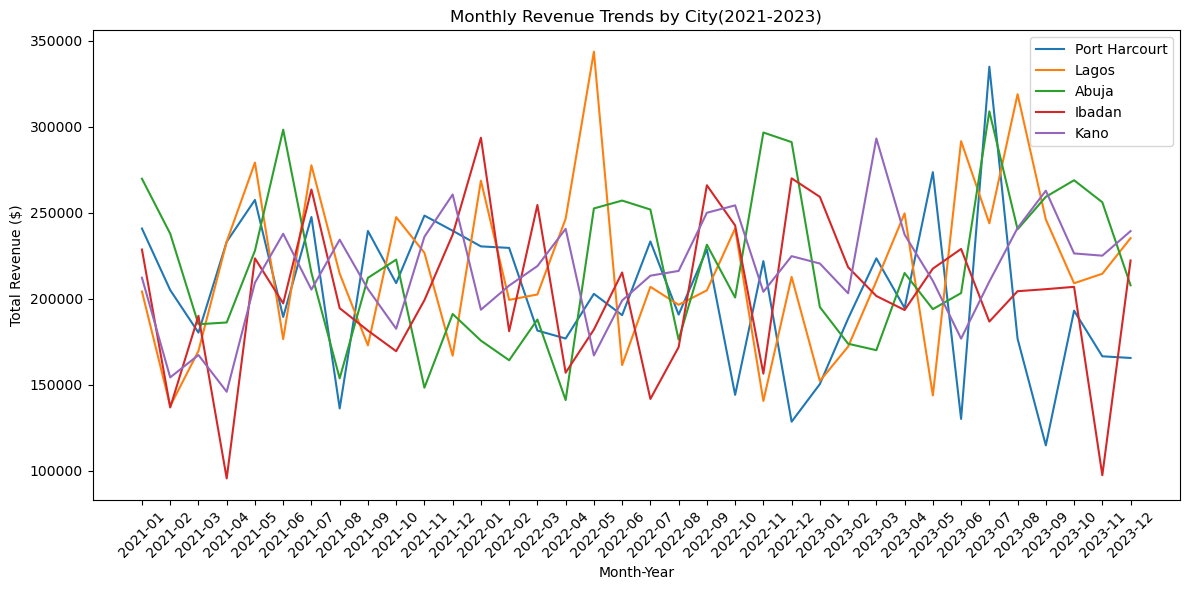

In [21]:
plt.figure(figsize=(12, 6))
for city in df["City"].unique():
    city_data = monthly_revenue[monthly_revenue["City"] == city]
    plt.plot(city_data["Month-Year"], city_data["Trip Fare"], label=city)
plt.title("Monthly Revenue Trends by City(2021-2023)")
plt.xlabel("Month-Year")
plt.ylabel("Total Revenue ($)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

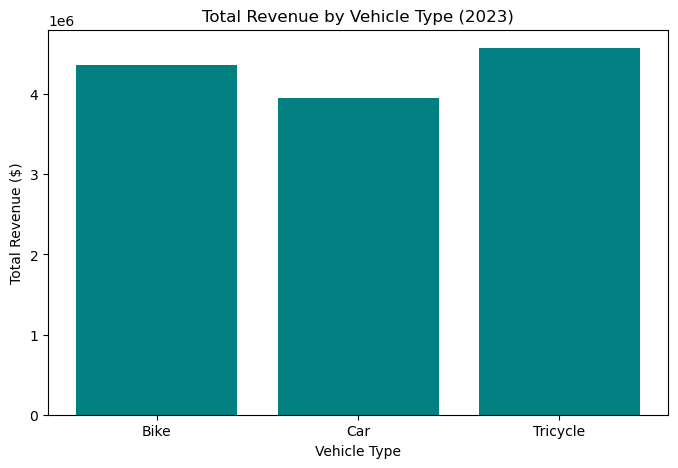

In [22]:
df_2023 = df[df["Trip Date"].dt.year == 2023]
category_revenue = df_2023.groupby("Vehicle Type")["Trip Fare"].sum().reset_index()
plt.figure(figsize=(8, 5))
plt.bar(category_revenue["Vehicle Type"], category_revenue["Trip Fare"],color="teal")
plt.title("Total Revenue by Vehicle Type (2023)")
plt.xlabel("Vehicle Type")
plt.ylabel("Total Revenue ($)")
plt.show()